In [125]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *

In [102]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet']

In [103]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")

In [104]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [105]:
len(study.trials)

377

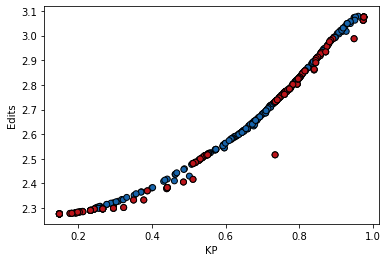

In [107]:
plot_study(study, "resnet", is_resnet=True)

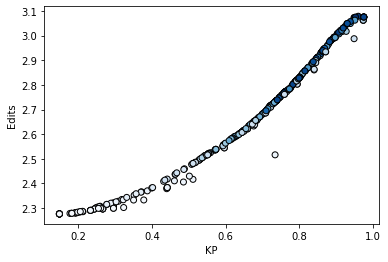

In [108]:
plot_study(study, "resnet_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"] / 10, is_resnet=True)

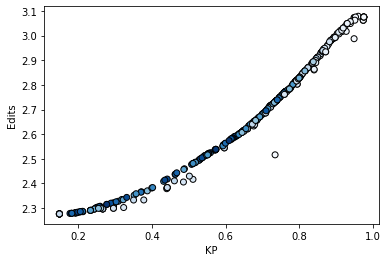

In [109]:
plot_study(study, "resnet_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"] / 3, is_resnet=True)

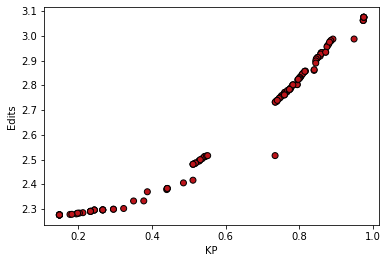

In [110]:
plot_study(study, "resnet_pareto", is_resnet=True, print_others=False)

In [111]:
np.average([t.params["max_dist"] for t in study.best_trials])

1.1667717778392743

In [112]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [117]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[0], target_name="KP")

In [118]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[1], target_name="edits")

In [122]:
x_names = ["lambd2", "max_dist"]
spearman = study_spearman(study, x_names, 2)

In [123]:
for i in range(len(x_names)):
    x_name = x_names[i]
    print(f"{x_name} spearman correlation is: {spearman.correlation[i][len(x_names)]} on KP, {spearman.correlation[i][len(x_names) + 1]} on edits.")
    print(f"{x_name} spearman pvalue is: {spearman.pvalue[i][len(x_names)]} on KP, {spearman.pvalue[i][len(x_names) + 1]} on edits.")

lambd2 spearman correlation is: 0.7731537447834749 on KP, 0.7794188527875592 on edits.
lambd2 spearman pvalue is: 8.81826635768371e-74 on KP, 1.0287393484464022e-75 on edits.
max_dist spearman correlation is: -0.573774120843351 on KP, -0.5590026460443003 on edits.
max_dist spearman pvalue is: 2.427879154880912e-33 on KP, 2.1803626626558933e-31 on edits.
